# Visual Qustion Answering Dataset

VQA Homepage http://visualqa.org/download.html

Annotations taken from [Training annotations 2017 v2.0](http://visualqa.org/data/mscoco/vqa/v2_Annotations_Train_mscoco.zip)

Questions taken from [Training questions 2017 v2.0](http://visualqa.org/data/mscoco/vqa/v2_Questions_Train_mscoco.zip)

![title](img/vqa_examples.jpg)

In [33]:
import json
import zipfile
import random
import numpy as np
from collections import Counter, defaultdict
from time import time
from IPython.display import Image

In [5]:
with zipfile.ZipFile('data/v2_Questions_Train_mscoco.zip', 'r') as file:
    qdata = json.load(file.open(file.namelist()[0]))

with zipfile.ZipFile('data/v2_Annotations_Train_mscoco.zip', 'r') as file:
    adata = json.load(file.open(file.namelist()[0])) 

### Preprocessing

* Spelling correction (using Bing Speller) of question and answer strings
* Question normalization (first char uppercase, last char ‘?’)
* Answer normalization (all chars lowercase, no period except as decimal point, number words —> digits, strip articles (a, an the))
* Adding apostrophe if a contraction is missing it (e.g., convert "dont" to "don't")

## Data Exploration

### Annotation Data

In [6]:
print("# Datapoints: ", len(adata['annotations']))
print("Datapoint keys: ", adata['annotations'][0].keys())

# Datapoints:  443757
Datapoint keys:  dict_keys(['question_type', 'multiple_choice_answer', 'answers', 'image_id', 'answer_type', 'question_id'])


Let's look at some datapoints:

In [7]:
print("#1: ", adata['annotations'][0])
print("\n#2: ", adata['annotations'][1])
print("\n#3: ", adata['annotations'][2])

#1:  {'question_type': 'what is this', 'multiple_choice_answer': 'net', 'answers': [{'answer': 'net', 'answer_confidence': 'maybe', 'answer_id': 1}, {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 2}, {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 3}, {'answer': 'netting', 'answer_confidence': 'yes', 'answer_id': 4}, {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 5}, {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 6}, {'answer': 'mesh', 'answer_confidence': 'maybe', 'answer_id': 7}, {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 8}, {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 9}, {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 10}], 'image_id': 458752, 'answer_type': 'other', 'question_id': 458752000}

#2:  {'question_type': 'what', 'multiple_choice_answer': 'pitcher', 'answers': [{'answer': 'pitcher', 'answer_confidence': 'yes', 'answer_id': 1}, {'answer': 'catcher', 'answer_confidence': 'no', 'answer_

### Question Data

In [8]:
print("# Datapoints: ", len(qdata['questions']))
print("\nDatapoint keys: ", qdata['questions'][0].keys())

# Datapoints:  443757

Datapoint keys:  dict_keys(['image_id', 'question', 'question_id'])


Let's look at some datapoints

In [31]:
print("#1: ", qdata['questions'][0]['image_id'])
print("\n#2: ", qdata['questions'][1])
print("\n#3: ", qdata['questions'][2])

#1:  458752

#2:  {'image_id': 458752, 'question': 'What position is this man playing?', 'question_id': 458752001}

#3:  {'image_id': 458752, 'question': 'What color is the players shirt?', 'question_id': 458752002}


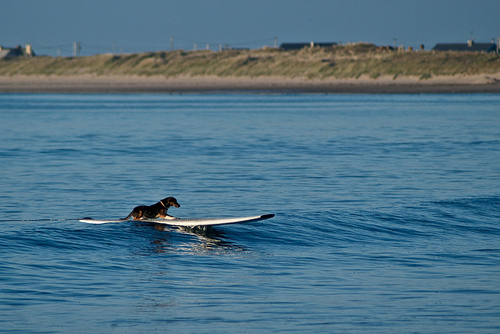

In [77]:
with open('data/imgid2imginfo.json', 'r') as file:
    imgid2info = json.load(file)

# Show image from imgid
def show_image(imgid):
    return Image(imgid2info[str(imgid)]['flickr_url'])


image_id = qdata['questions'][54]['image_id'] # Example

show_image(image_id) # Example

### Dataset Statistics

In [10]:
question_types = set()
multiple_choice_answers = set()
answer2count = defaultdict(int)
answer_types = set()
answertypes2count = defaultdict(int)
top_answers_per_type = defaultdict(lambda: defaultdict(int))
for ann in adata['annotations']:
    question_types.add(ann['question_type'])
    
    multiple_choice_answers.add(ann['multiple_choice_answer'])
    
    answer2count[ann['multiple_choice_answer']] += 1
    answer_types.add(ann['answer_type'])
    
    answertypes2count[ann['answer_type']] += 1
    top_answers_per_type[ann['answer_type']][ann['multiple_choice_answer']] += 1

#### Question Types

In [11]:
print("# Unique Question Types: ", len(question_types))
print(question_types)

# Unique Question Types:  65
{'how many', 'is there a', 'could', 'is the person', 'what type of', 'is there', 'do', 'what is the name', 'what sport is', 'are', 'what color is the', 'is the man', 'what kind of', 'what color are the', 'does the', 'are they', 'is this an', 'what color is', 'is it', 'are these', 'does this', 'what number is', 'where are the', 'who is', 'are the', 'was', 'is this person', 'why is the', 'what is the color of the', 'what are', 'what time', 'is he', 'has', 'are there', 'how many people are', 'is this a', 'is the', 'where is the', 'what is the woman', 'what is in the', 'what are the', 'none of the above', 'which', 'are there any', 'what animal is', 'what room is', 'can you', 'what is', 'is the woman', 'is this', 'what brand', 'why', 'what is the', 'is', 'what does the', 'what is the man', 'how many people are in', 'what', 'what is on the', 'do you', 'is that a', 'what is the person', 'how', 'what is this', 'what color'}


#### Answer Types

In [12]:
print("Answer Types: ", answer_types)
print("Answer Type Counts: ", Counter(answertypes2count).most_common())
for t in list(answer_types):
    print("\nType '%s' Top 50 Answers %s" %(t, Counter(top_answers_per_type[t]).most_common(50)))

Answer Types:  {'yes/no', 'number', 'other'}
Answer Type Counts:  [('other', 219269), ('yes/no', 166882), ('number', 57606)]

Type 'yes/no' Top 50 Answers [('yes', 84615), ('no', 82263), ('africa', 1), ('not', 1), ('cutting apples', 1), ('cups', 1)]

Type 'number' Top 50 Answers [('1', 12520), ('2', 12194), ('3', 6527), ('0', 4860), ('4', 4112), ('5', 2359), ('6', 1452), ('10', 972), ('7', 937), ('8', 907), ('12', 519), ('9', 514), ('20', 430), ('11', 360), ('15', 303), ('many', 258), ('25', 246), ('13', 242), ('30', 194), ('14', 175), ('50', 173), ('16', 147), ('100', 133), ('24', 127), ('18', 103), ('17', 82), ('40', 68), ('21', 64), ('200', 63), ('lot', 54), ('2 feet', 51), ('22', 51), ('19', 50), ('one way', 49), ('23', 49), ('27', 48), ('28', 45), ('38', 44), ('35', 42), ('10 feet', 38), ('55', 36), ('3 feet', 36), ('45', 33), ('26', 33), ('29', 31), ('60', 31), ('2010', 29), ('34', 27), ('32', 27), ('10:20', 27)]

Type 'other' Top 50 Answers [('white', 8915), ('blue', 5455), ('re

#### Answers

In [13]:
print("# Unique Answers: ", len(multiple_choice_answers))
print("\nSome Answers: ", list(np.random.choice(list(multiple_choice_answers), 100)))
print("\nTop 100 Common Answers: ", Counter(answer2count).most_common(100))

# Unique Answers:  22531

Some Answers:  ['boy on right', 'it is moving', 'british', 'airplanes', 'next to laptop', 'barrel', '371-355', 'this 1', 'foggy', '1600 pennsylvania ave', 'holding sandwich together', 'northern', '03/31/2009', 'time warp shelf clock', 'not real', 'who can say', 'elephants and birds', 'dishwasher', 'the tar sands', '599', 'in plane', 'there are no suitcases', 'package', 'hsbc logo', 'del taco', 'dirt on pants', 'apples, blueberries, cherries', 'some are babies', 'william gibson', 'presenting', 'wilson', 'standing in line', '197', 'cereal bowl', 'optare', 'dilbert', 'people drew it', 'moving ski poles', 'bag', 'v', 'crumbs', 'cameraman', '5:03', 'sfsu', 'wwwfeelinggreatcom', 'dirt road', 'will s sider', 'ballard', 'metroline', 'stick', 'most', 'supervisor', 'vines', 'plumber', 'under coffee table', 'sugar packet', 'no stopping or staging', '1:05', 'konnowac', 'irrelevant', 'trick', 'blue, orange, pink', 'picking up pastries', 'blue yellow', 'bus company', 'white

## Dataset Creation

The subset will follow the same structure as the original VQA dataset. This is:

* Answer
    * Question Type
    * Majority Answer
    * Answer Type
    * Answer Candidates
        * Given Answer
        * Confidence
        * Answerer ID
        
        
* Question
    * Question
    * Image ID
   
   
* Images
    * ResNet Image Features (Size: 2048)
    

In order to train your models on your machine with a CPU (or if you have a GPU), we need to reduce the size of the Dataset. We will reduce the original dataset in the following way:
* 20k Q/A of answer type _yes/no_
* 20k Q/A of answer type _number_
* 20k Q/A of answer type _other_

The total number of Q/A will then be 60000. We will divide into training, validation and test split. The ratio between the splits will be approximately: 80%, 15%, 5% respectively.

In [14]:
start_time = time()
idx = list(range(0,len(qdata['questions'])))
random.seed(42)
random.shuffle(idx)

np.random.seed(42)
splits = ['train', 'valid', 'test']

n = 20000
qdata_small = {'questions': list()}
adata_small = {'annotations': list()}
a_type_counts = {'yes/no': 0, 'number': 0, 'other': 0}

while len(qdata_small['questions']) < 3*n:
    i = idx.pop()
    
    at = adata['annotations'][i]['answer_type'] 
    
    if a_type_counts[at] < n:
        
        if at == 'yes/no' and adata['annotations'][i]['multiple_choice_answer'] not in ['yes', 'no']:
            continue
            
        adata_small['annotations'].append(adata['annotations'][i])
        qdata_small['questions'].append(qdata['questions'][i])
        
        split = np.random.choice(splits, p=(.8, .15, .05))
        adata_small['annotations'][-1]['split'] = split
        qdata_small['questions'][-1]['split'] = split
        
        a_type_counts[at] += 1
        
# Tests
assert len(qdata_small['questions']) == len(adata_small['annotations']) == 3*n, "Inconsitent Lengths."
a_type_counts = {'yes/no': 0, 'number': 0, 'other': 0}
for ann in adata_small['annotations']:
    a_type_counts[ann['answer_type']] += 1
assert a_type_counts['yes/no'] == a_type_counts['number'] == a_type_counts['other'] == n, "Inconsistent Answer Type Lengths."

print("Data Creation Looks good! Time Taken %.2f" %(time()-start_time))

Data Creation Looks good! Time Taken 2.83


Let's look at some examples to verify this is the same data. Calculating the statistics again.

#### Annotations Small Dataset

In [15]:
print("# Datapoints: ", len(adata_small['annotations']))
print("\nDatapoint keys: ", adata_small['annotations'][0].keys())
print("\n#1: ", adata_small['annotations'][0])
print("\n#2: ", adata_small['annotations'][1])
print("\n#3: ", adata_small['annotations'][2])

# Datapoints:  60000

Datapoint keys:  dict_keys(['question_type', 'multiple_choice_answer', 'answers', 'image_id', 'answer_type', 'question_id', 'split'])

#1:  {'question_type': 'what', 'multiple_choice_answer': 'tea', 'answers': [{'answer': 'brunch', 'answer_confidence': 'maybe', 'answer_id': 1}, {'answer': 'tea', 'answer_confidence': 'yes', 'answer_id': 2}, {'answer': 'tea time', 'answer_confidence': 'yes', 'answer_id': 3}, {'answer': 'brunch', 'answer_confidence': 'yes', 'answer_id': 4}, {'answer': 'breakfast', 'answer_confidence': 'maybe', 'answer_id': 5}, {'answer': 'tea', 'answer_confidence': 'yes', 'answer_id': 6}, {'answer': 'teatime', 'answer_confidence': 'yes', 'answer_id': 7}, {'answer': 'lunch', 'answer_confidence': 'yes', 'answer_id': 8}, {'answer': 'reception', 'answer_confidence': 'maybe', 'answer_id': 9}, {'answer': 'breakfast', 'answer_confidence': 'yes', 'answer_id': 10}], 'image_id': 228478, 'answer_type': 'other', 'question_id': 228478002, 'split': 'train'}

#2:  

#### Questions Small Dataset

In [16]:
print("# Datapoints: ", len(qdata_small['questions']))
print("\nDatapoint keys: ", qdata_small['questions'][0].keys())
print("\n#1: ", qdata_small['questions'][0])
print("\n#2: ", qdata_small['questions'][1])
print("\n#3: ", qdata_small['questions'][2])

# Datapoints:  60000

Datapoint keys:  dict_keys(['image_id', 'question', 'question_id', 'split'])

#1:  {'image_id': 228478, 'question': 'What English meal is this likely for?', 'question_id': 228478002, 'split': 'train'}

#2:  {'image_id': 540769, 'question': 'Is there a bell on the train?', 'question_id': 540769000, 'split': 'test'}

#3:  {'image_id': 111756, 'question': 'What color is his uniform?', 'question_id': 111756005, 'split': 'train'}


### Dataset Statistics Small Dataset

In [17]:
question_types = set()
multiple_choice_answers = set()
answer2count = defaultdict(int)
answer_types = set()
answertypes2count = defaultdict(int)
top_answers_per_type = defaultdict(lambda: defaultdict(int))
for ann in adata_small['annotations']:
    question_types.add(ann['question_type'])
    
    multiple_choice_answers.add(ann['multiple_choice_answer'])
    
    answer2count[ann['multiple_choice_answer']] += 1
    answer_types.add(ann['answer_type'])
    
    answertypes2count[ann['answer_type']] += 1
    top_answers_per_type[ann['answer_type']][ann['multiple_choice_answer']] += 1

#### Quesiton Types Small Dataset

In [18]:
print("# Unique Question Types: ", len(question_types))
print(question_types)

# Unique Question Types:  65
{'how many', 'is there a', 'what type of', 'is the person', 'could', 'is there', 'do', 'what is the name', 'what sport is', 'are', 'what kind of', 'what color is the', 'is the man', 'what color are the', 'does the', 'are they', 'is this an', 'what color is', 'are these', 'is it', 'what number is', 'does this', 'where are the', 'who is', 'are the', 'is this person', 'was', 'is he', 'what are', 'why is the', 'what time', 'what is the color of the', 'has', 'are there', 'how many people are', 'is this a', 'where is the', 'is the', 'what is the woman', 'what is in the', 'what are the', 'none of the above', 'which', 'what animal is', 'are there any', 'what room is', 'can you', 'what is', 'is the woman', 'is this', 'what brand', 'why', 'what is the', 'is', 'what does the', 'what is the man', 'how many people are in', 'what', 'what is on the', 'do you', 'is that a', 'what is the person', 'how', 'what is this', 'what color'}


#### Answer Types Small Dataset

In [19]:
print("Answer Types: ", answer_types)
print("Answer Type Counts: ", Counter(answertypes2count).most_common())
for t in list(answer_types):
    print("\nType '%s' Top 50 Answers %s" %(t, Counter(top_answers_per_type[t]).most_common(50)))

Answer Types:  {'yes/no', 'number', 'other'}
Answer Type Counts:  [('other', 20000), ('yes/no', 20000), ('number', 20000)]

Type 'yes/no' Top 50 Answers [('yes', 10178), ('no', 9822)]

Type 'number' Top 50 Answers [('1', 4298), ('2', 4281), ('3', 2270), ('0', 1677), ('4', 1382), ('5', 817), ('6', 510), ('8', 337), ('7', 330), ('10', 321), ('12', 190), ('9', 170), ('11', 135), ('20', 134), ('15', 97), ('25', 89), ('13', 87), ('many', 81), ('30', 77), ('14', 61), ('50', 56), ('16', 53), ('24', 52), ('100', 50), ('18', 46), ('17', 35), ('21', 24), ('27', 23), ('200', 23), ('19', 19), ('2 feet', 19), ('40', 19), ('10 feet', 19), ('lot', 17), ('3 feet', 16), ('35', 16), ('22', 16), ('one way', 15), ('5 years', 14), ('23', 14), ('28', 13), ('2012', 12), ('55', 12), ('old', 12), ('38', 12), ('2016', 11), ('12:00', 11), ('10:20', 11), ('29', 10), ('2010', 10)]

Type 'other' Top 50 Answers [('white', 823), ('red', 494), ('black', 460), ('blue', 449), ('green', 355), ('brown', 331), ('yellow', 2

#### Answers Small Dataset

In [20]:
print("# Unique Answers: ", len(multiple_choice_answers))
print("\nSome Answers: ", list(np.random.choice(list(multiple_choice_answers), 100)))
print("\nTop 100 Common Answers: ", Counter(answer2count).most_common(100))

# Unique Answers:  5691

Some Answers:  ["in man's hand", 'oak', 'centre ville paris', '400', 'ski lifts', 'get food', '1:00', 'lego', '2 people', 'same event', '15 mph', 'to fence', 'bic', 'food', 'concentrating', 'lagny', '11:18', 'gray and white', 'on paper', 'garuda', 'coffee maker', '488', 'unity', 'each other', 'toiletries', 'on slope', 'identification', 'star', 'hit ball', 'winter', 'mile', 'dress', "girl's", 'parked in front of fire hydrant', 'sticks', 'half full', 'just hit ball', '1313', 'ears are up', 'printer', 'top left', '2 inch', 'shirt', 'f', 'traffic cone', '17', 'skull', 'mesh', 'blue and red', 'pizza', 'e canal st', '147', 'lift', 'fdr drive', 'on boat', 'all stars', '12 hours', 'tissue', 'grapes', 'on tree', 'not finished', 'chef', 'camera', 'hexagon', 'fireworks', '100', 'hearts', '4051', '5135', 'on top', 'blues brothers', 'microwave', 'joanne', 'rough', 'elephants', 'in white', '1932', 'f8 246', '28', 'trek', 'gnu', 'speaker', 'ear tags', 'downtown', 'lilies', '4

## Saving

In [21]:
import gzip

### Splitting

In [22]:
qdata_small_splits = {\
                      'train': {'questions': list()}, 
                      'valid': {'questions': list()}, 
                      'test': {'questions': list()}
                     }

adata_small_splits = {\
                      'train': {'annotations': list()}, 
                      'valid': {'annotations': list()}, 
                      'test': {'annotations': list()}
                     }

for i in range(len(qdata_small['questions'])):
    
    split = qdata_small['questions'][i]['split']
    assert split == adata_small['annotations'][i]['split'], "Inconsistent Splits."
    assert adata_small['annotations'][i]['question_id'] == qdata_small['questions'][i]['question_id'], "Inconsistent IDs."
    
    qdata_small_splits[split]['questions'].append(qdata_small['questions'][i])
    adata_small_splits[split]['annotations'].append(adata_small['annotations'][i])
    
        
print("Training Set Size: %i" %(len(qdata_small_splits['train']['questions'])))
print("\nValidation Set Size: %i" %(len(qdata_small_splits['valid']['questions'])))
print("\nTest Set Size: %i" %(len(qdata_small_splits['test']['questions'])))

Training Set Size: 48061

Validation Set Size: 8977

Test Set Size: 2962


### Write out the files

In [23]:
for split in ['train', 'valid', 'test']:
    
    with gzip.GzipFile('data/vqa_annotatons_' + split + '.gzip', 'w') as file:
        file.write(json.dumps(adata_small_splits[split]).encode('utf-8'))
        
    with gzip.GzipFile('data/vqa_questions_' + split + '.gzip', 'w') as file:
        file.write(json.dumps(qdata_small_splits[split]).encode('utf-8'))

Get list of all image ids

In [24]:
image_ids = set()
for q in qdata_small['questions']:
    image_ids.add(q['image_id'])

image_ids_json = {'image_ids': list(image_ids)}
with open('data/image_ids_vqa.json', 'w') as file:
    json.dump(image_ids_json, file)